# Make Species Venn Diagram

Count only in one database:
REFSEQ:
1570
ENSEMBL:
392
PATRIC:
16326
Count in two databases:
Ensembl_REFSEQ:
71
Ensembl_PATRIC:
1088
REFSEQ_PATRIC:
16347
18288
17506
6543


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


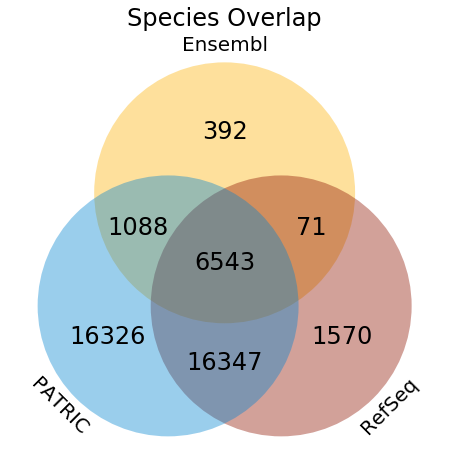

In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv


cnx = sqlite3.connect(r'../data/bact_data_from_summarys.db')
      
occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM BACT_DB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM BACT_DB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM BACT_DB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)


# Combos of one

ENSEMBL = 0
REFSEQ = 0 
PATRIC = 0 

REFSEQ = pd.read_sql_query("SELECT SPECIESTAXID FROM BACT_DB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'REFSEQ'", cnx)

ENSEMBL = pd.read_sql_query("SELECT SPECIESTAXID FROM BACT_DB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBL'", cnx)

PATRIC = pd.read_sql_query("SELECT SPECIESTAXID FROM BACT_DB Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'PATRIC'", cnx)

print("Count only in one database:")
print("REFSEQ:")
print(REFSEQ.size)
print("ENSEMBL:")
print(ENSEMBL.size)
print("PATRIC:")
print(PATRIC.size)



# combos of two

ENSEMBL_REFSEQ = 0 
ENSEMBL_PATRIC = 0 
REFSEQ_PATRIC = 0


for index, row in occur_twice.iterrows():
    SPECIEStaxid = row["SPECIESTAXID"]
    if str(SPECIEStaxid) == 'nan':
        print("Is skip a speciestaxid for 2")
        continue
    databases = pd.read_sql_query("SELECT DBNAME FROM BACT_DB WHERE SPECIESTAXID =" + str(SPECIEStaxid), cnx)
    ENSEMBL_tmp = 0
    REFSEQ_tmp = 0
    PATRIC_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBL":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "REFSEQ":
            REFSEQ_tmp = 1
        if r["DBNAME"] == "PATRIC":
            PATRIC_tmp = 1
    if ENSEMBL_tmp == 1 and REFSEQ_tmp == 1:  
        ENSEMBL_REFSEQ += 1      
    if ENSEMBL_tmp == 1 and PATRIC_tmp == 1:
        ENSEMBL_PATRIC += 1  
    if REFSEQ_tmp == 1 and PATRIC_tmp == 1:
        REFSEQ_PATRIC += 1 

print("Count in two databases:")

print("Ensembl_REFSEQ:")
print(ENSEMBL_REFSEQ)

print("Ensembl_PATRIC:")
print(ENSEMBL_PATRIC)

print("REFSEQ_PATRIC:")
print(REFSEQ_PATRIC)


# Combos of three

ENSEMBL_REFSEQ_PATRIC = occur_thrice.size



print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations

sets = 'ENSEMBL REFSEQ PATRIC'.split()
subsets = [ENSEMBL.size, REFSEQ.size, PATRIC.size, ENSEMBL_REFSEQ, ENSEMBL_PATRIC, REFSEQ_PATRIC, ENSEMBL_REFSEQ_PATRIC]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn3(subsets, ax=ax, set_labels = ('Ensembl', 'RefSeq', 'PATRIC'), set_label_fontsize=20, subset_label_fontsize=24);


ax.set_title('Species Overlap', fontsize=24)
plt.savefig('primary_figures/bact_SPECIES_Distribution.png', bbox_inches='tight')
plt.savefig('primary_figures/bact_SPECIES_Distribution.pdf', bbox_inches='tight')
plt.savefig('primary_figures/bact_SPECIES_Distribution.eps', bbox_inches='tight')

# Make Venn Diagram for Genus

80
118
PATRIC:
366
4
39
1350
564
1393
1414


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


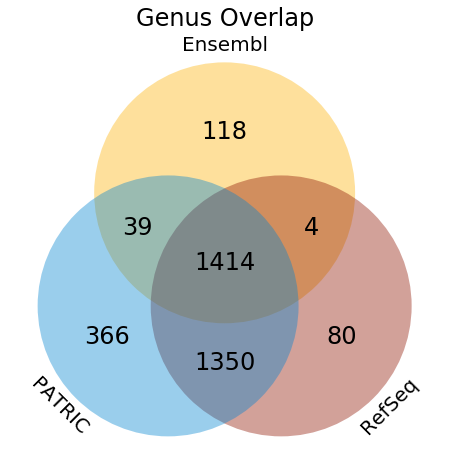

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/bact_data_from_summarys.db')
  
occur_once = pd.read_sql_query("SELECT GENUSTAXID FROM BACT_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT GENUSTAXID FROM BACT_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT GENUSTAXID FROM BACT_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)


# Combos of one

ENSEMBL = 0 
REFSEQ = 0 
PATRIC = 0 


REFSEQ = pd.read_sql_query("SELECT GENUSTAXID FROM BACT_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'REFSEQ'", cnx)

ENSEMBL = pd.read_sql_query("SELECT GENUSTAXID FROM BACT_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBL'", cnx)

PATRIC = pd.read_sql_query("SELECT GENUSTAXID FROM BACT_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'PATRIC'", cnx)


print(REFSEQ.size)
print(ENSEMBL.size)
print("PATRIC:")
print(PATRIC.size)



# combos of two

ENSEMBL_REFSEQ = 0  
ENSEMBL_PATRIC = 0 
REFSEQ_PATRIC = 0


for index, row in occur_twice.iterrows():
    GENUStaxid = row["GENUSTAXID"]
    databases = pd.read_sql_query("SELECT DBNAME FROM BACT_DB WHERE GENUSTAXID =" + str(GENUStaxid), cnx)
    ENSEMBL_tmp = 0
    REFSEQ_tmp = 0
    PATRIC_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBL":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "REFSEQ":
            REFSEQ_tmp = 1
        if r["DBNAME"] == "PATRIC":
            PATRIC_tmp = 1
    if ENSEMBL_tmp == 1 and REFSEQ_tmp == 1:  
        ENSEMBL_REFSEQ += 1       
    if ENSEMBL_tmp == 1 and PATRIC_tmp == 1:
        ENSEMBL_PATRIC += 1  
    if REFSEQ_tmp == 1 and PATRIC_tmp == 1:
        REFSEQ_PATRIC += 1 


print(ENSEMBL_REFSEQ)
print(ENSEMBL_PATRIC)
print(REFSEQ_PATRIC)


# Combos of three

ENSEMBL_REFSEQ_PATRIC = 0 


for index, row in occur_thrice.iterrows():
    GENUStaxid = row["GENUSTAXID"]
    databases = pd.read_sql_query("SELECT DBNAME FROM BACT_DB WHERE GENUSTAXID =" + str(GENUStaxid), cnx)
    ENSEMBL_tmp = 0
    REFSEQ_tmp = 0
    PATRIC_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBL":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "REFSEQ":
            REFSEQ_tmp = 1
        if r["DBNAME"] == "PATRIC":
            PATRIC_tmp = 1
    if ENSEMBL_tmp == 1 and REFSEQ_tmp == 1 and PATRIC_tmp == 1: 
        ENSEMBL_REFSEQ_PATRIC += 1



print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations

sets = 'ENSEMBL REFSEQ PATRIC'.split()
subsets = [ENSEMBL.size, REFSEQ.size, PATRIC.size, ENSEMBL_REFSEQ, ENSEMBL_PATRIC, REFSEQ_PATRIC, ENSEMBL_REFSEQ_PATRIC]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn3(subsets, ax=ax, set_labels = ('Ensembl', 'RefSeq', 'PATRIC'), set_label_fontsize=20, subset_label_fontsize=24);


ax.set_title('Genus Overlap', fontsize=24)
plt.savefig('primary_figures/bact_GENUS_Distribution.png', bbox_inches='tight')
plt.savefig('primary_figures/bact_GENUS_Distribution.pdf', bbox_inches='tight')
plt.savefig('primary_figures/bact_GENUS_Distribution.eps', bbox_inches='tight')

# Contig length plots

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/bacteria_data.db')

REFSEQ = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'REFSEQ'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBL'", cnx)
PATRIC = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'PATRIC'", cnx)


REFSEQ_chr = []
REFSEQ_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []
PATRIC_chr = []
PATRIC_contig = []

#  divided by 1 million to correct y axis to be terms of millions
for index, row in REFSEQ.iterrows():
    if row["avg_length_contig"] > 0:
        REFSEQ_contig.append(row["avg_length_contig"] / 1000000.0)
        
for index, row in ensembl.iterrows():
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in PATRIC.iterrows():
    if row["avg_length_contig"] > 0:
        PATRIC_contig.append(row["avg_length_contig"] / 1000000.0)



file=open('bact.contig.length.csv','w')
file.write('db,type,length\n')

for i in REFSEQ_chr:
    if i!=0:
        file.write('REFSEQ,chr,'+str(i))
        file.write("\n")

for i in REFSEQ_contig:
    if i!=0:
        file.write('REFSEQ,contig,'+str(i))
        file.write("\n")

for i in ENSEMBL_chr:
    if i!=0:
        file.write('ENSEMBL,chr,'+str(i))
        file.write("\n")

for i in ENSEMBL_contig:
    if i!=0:
        file.write('ENSEMBL,contig,'+str(i))
        file.write("\n")
        
for i in PATRIC_chr:
    if i!=0:
        file.write('PATRIC,chr,'+str(i))
        file.write("\n")

for i in PATRIC_contig:
    if i!=0:
        file.write('PATRIC,contig,'+str(i))
        file.write("\n")
        
file.close()

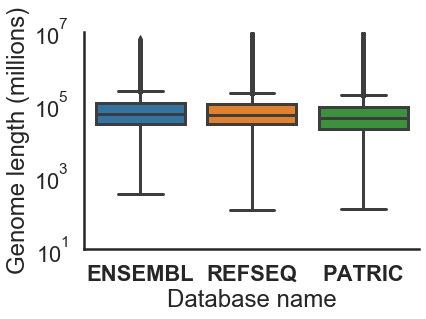

In [4]:
import seaborn as sns

data=pd.read_csv('bact.contig.length.csv')
data['length_real'] = data['length'] * 1000000


g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.boxplot(y="length_real", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "PATRIC"])

# ax = sns.catplot(y="length_real", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "PATRIC"])
ax.set(ylabel='Genome length (millions)', xlabel='Database name', yscale = 'log', ylim = (10, 10000000.0))

# ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("primary_figures/bact.boxplot.contig.length.png", bbox_inches='tight')
plt.savefig("primary_figures/bact.boxplot.contig.length.pdf", bbox_inches='tight')
plt.savefig("primary_figures/bact.boxplot.contig.length.eps", bbox_inches='tight')

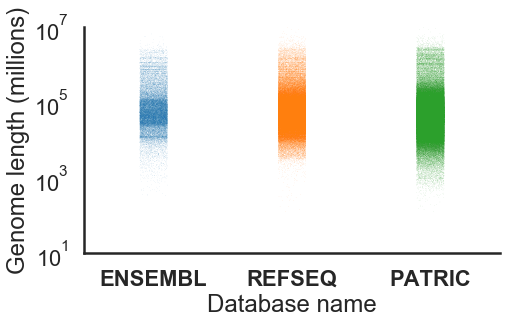

In [5]:
import seaborn as sns

data=pd.read_csv('bact.contig.length.csv')
data['length_real'] = data['length'] * 1000000


g=sns.set_style("white")
g=sns.set_context("poster")

# ax = sns.boxenplot(y="length", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "PATRIC"])

ax = sns.catplot(y="length_real", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "PATRIC"], height=5,aspect=1.5, s=.25)
ax.set(ylabel='Genome length (millions)', xlabel='Database name', yscale = 'log', ylim = (10, 10000000.0))

# ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("primary_figures/bact.dott.contig.length.png", bbox_inches='tight')
plt.savefig("primary_figures/bact.dott.contig.length.pdf", bbox_inches='tight')
plt.savefig("primary_figures/bact.dott.contig.length.eps", bbox_inches='tight')

In [6]:
#print numbers for averages

df1 = data.groupby("db").sum()
df2 = data.groupby("db").count()

print("Sum: ")
print(df1)
print("Count: ")
print(df2)

Sum: 
               length   length_real
db                                 
ENSEMBL   5733.403588  5.733404e+09
PATRIC   23894.255547  2.389426e+10
REFSEQ   18373.411191  1.837341e+10
Count: 
           type  length  length_real
db                                  
ENSEMBL   38528   38528        38528
PATRIC   222386  222386       222386
REFSEQ   153777  153777       153777


# Combined DNA Type Breakdown (ENSEMBL, 1K, NCBI)

[ENSEMBL, REFSEQ, PATRIC]
chrom: [10.997094079186343, 9.916609278881488, 2.5342643926707527]
contig: [88.79177261169633, 89.76857772813814, 97.44053522363309]
chrom_and_contig [0.21113330911732656, 0.09143465604944416, 0.02357455248996049]


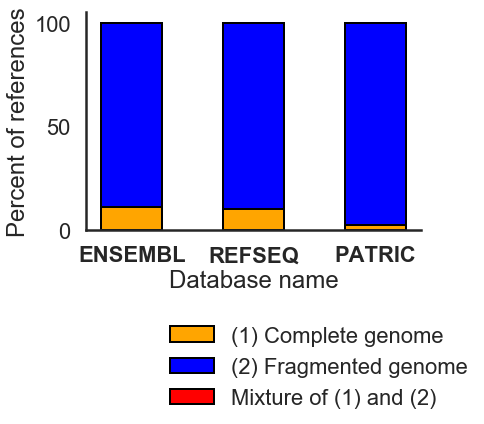

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import sqlite3
 
cnx = sqlite3.connect(r'../data/bacteria_data.db')

ensembl_total = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'ENSEMBL'", cnx).size
ensembl_chr = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'ENSEMBL' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ensembl_total)*100
ensembl_contig = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'ENSEMBL' AND chromosome_count == 0 AND contig_count >0", cnx).size / ensembl_total)*100
ensembl_chrom_and_contig = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'ENSEMBL' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ensembl_total)*100

REFSEQ_total = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'REFSEQ'", cnx).size
REFSEQ_chr = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'REFSEQ' AND chromosome_count > 0 AND contig_count == 0", cnx).size / REFSEQ_total)*100
REFSEQ_contig = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'REFSEQ' AND chromosome_count == 0 AND contig_count >0", cnx).size / REFSEQ_total)*100
REFSEQ_chrom_and_contig = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'REFSEQ' AND chromosome_count > 0 AND contig_count > 0", cnx).size / REFSEQ_total)*100

PATRIC_total = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'PATRIC'", cnx).size
PATRIC_chr = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'PATRIC' AND chromosome_count > 0 AND contig_count == 0", cnx).size / PATRIC_total)*100
PATRIC_contig = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'PATRIC' AND chromosome_count == 0 AND contig_count >0", cnx).size / PATRIC_total)*100
PATRIC_chrom_and_contig = (pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'PATRIC' AND chromosome_count > 0 AND contig_count > 0", cnx).size / PATRIC_total)*100


# [ENSEMBL, REFSEQ, PATRIC]
chrom = [ensembl_chr, REFSEQ_chr, PATRIC_chr]
contig = [ensembl_contig, REFSEQ_contig, PATRIC_contig]
chrom_and_contig = [ensembl_chrom_and_contig ,REFSEQ_chrom_and_contig, PATRIC_chrom_and_contig]


print("[ENSEMBL, REFSEQ, PATRIC]")
print("chrom:", chrom) 
print("contig:", contig) 
print("chrom_and_contig", chrom_and_contig)

# Heights of chrom + contig
bars = [ensembl_chr + ensembl_contig, REFSEQ_chr + REFSEQ_contig, PATRIC_chr + PATRIC_contig]

# Heights of chrom + contig + mixture
# bars2 = [bars[0] + ensembl_chrom_and_contig , bars[1] +REFSEQ_chrom_and_contig, bars[2] + onek_chrom_and_contig]

# The position of the bars on the x-axis
r = [0,2,4]

# Names of group and bar width
names = ['ENSEMBL','REFSEQ','PATRIC']
barWidth = 1

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, chrom, color='orange', edgecolor='black', width=barWidth)
# Create blue bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, contig, bottom=chrom, color='blue', edgecolor='black', width=barWidth)
# Create red bars (second from top)
p3 = plt.bar(r, chrom_and_contig, bottom=bars, color='red', edgecolor='black', width=barWidth)


# create green bars (top) containing plasmid sequences
# p4 = plt.bar(r, other, bottom=bars2, color='green', edgecolor='black', width=barWidth)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Percent of references")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('(1) Complete genome', '(2) Fragmented genome', 'Mixture of (1) and (2)'), bbox_to_anchor=(1.2, -0.35),frameon=False)




g=sns.despine()
plt.savefig("primary_figures/bact.contigs.vs.chr.png", bbox_inches='tight')
plt.savefig("primary_figures/bact.contigs.vs.chr.pdf", bbox_inches='tight')
plt.savefig("primary_figures/bact.contigs.vs.chr.eps", bbox_inches='tight')

# Plasmid composition

660720
2592015
3690420
29835
127890
43380
[ENSEMBL, REFSEQ, PATRIC]
[4.515528514347984, 4.933999224541525, 1.1754759620856163]


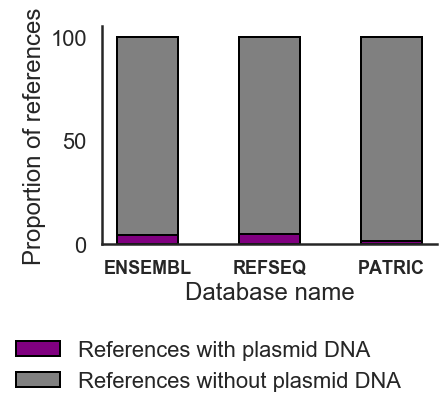

In [8]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

cnx = sqlite3.connect(r'../data/bacteria_data.db')

ensembl_species = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'ENSEMBL'", cnx).size
REFSEQ_species = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'REFSEQ'", cnx).size
PATRIC_species = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'PATRIC'", cnx).size


ensembl_plasmid_species = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'ENSEMBL' AND plasmid_count > 0", cnx).size
REFSEQ_plasmid_species = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'REFSEQ' AND plasmid_count > 0", cnx).size
PATRIC_plasmid_species = pd.read_sql_query("SELECT * FROM SPECIESDB where dbname = 'PATRIC' AND plasmid_count > 0", cnx).size


prop_ensembl_with_plasmid = (ensembl_plasmid_species / float(ensembl_species) ) * 100
prop_REFSEQ_with_plasmid = (REFSEQ_plasmid_species / float(REFSEQ_species) ) * 100
prop_PATRIC_with_plasmid = (PATRIC_plasmid_species / float(PATRIC_species) ) * 100

print(ensembl_species)
print(REFSEQ_species)
print(PATRIC_species)

print(ensembl_plasmid_species)
print(REFSEQ_plasmid_species)
print(PATRIC_plasmid_species)


    # [ENSEMBL, REFSEQ, PATRIC]
proportion_plasmid = [prop_ensembl_with_plasmid, prop_REFSEQ_with_plasmid, prop_PATRIC_with_plasmid]
proportion_no_plasmid = [100 - prop_ensembl_with_plasmid, 100 - prop_REFSEQ_with_plasmid, 100 - prop_PATRIC_with_plasmid ]

print("[ENSEMBL, REFSEQ, PATRIC]")
print(proportion_plasmid)
# The position of the bars on the x-axis
r = [0,2,4]
 
# Names of group and bar width
names = ['ENSEMBL','REFSEQ', 'PATRIC']
barWidth = 1

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for plasmid dna
p1 = plt.bar(r, proportion_plasmid, color='purple', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the first ones for other
p2 = plt.bar(r, proportion_no_plasmid, bottom=proportion_plasmid, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold', fontsize=18)
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Proportion of references")

#  legend
plt.legend((p1[0], p2[0]), ('References with plasmid DNA', 'References without plasmid DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)



g=sns.despine()
plt.savefig("supplementary_figures/bact.plasmid.png", bbox_inches='tight')
plt.savefig("supplementary_figures/bact.plasmid.pdf", bbox_inches='tight')
plt.savefig("supplementary_figures/bact.plasmid.eps", bbox_inches='tight')